### Loading Data

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_excel("Final Sheet.xlsx", sheet_name="Data (2)")

### Roles vs How they find out there's an event that could affect their facility 

In [1]:
# Making a new derived Roles column
# Define conditions
conditions = [
    (df['Q3)  role_Owner']+df['Q3)  role_Manager']+df['Q3) role_Teacher'])>1,
    (df['Q3)  role_Owner']==1),
    (df['Q3)  role_Manager']==1),
    df['Q3) role_Teacher']==1,
]

# Define corresponding values for the new column
values = ['More than One Role', 'Owner', 'Manager','Teacher']

# Apply the conditions
df['Roles'] = np.select(conditions, values, default='No Match')
df=df[df['Roles']!='No Match']

# Values for aggregation
values = ['Q9_Other_words','Q9_Supervisor_Words','Q9_Friends_Family_Words','Q9_Unknown_Words','Q9a) event_Notification_Cellphone_Alert_WORDS','Q9_Parent_Guardian_Words','Q9_television_Radio_words'] 
rows = ['Roles'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc='count'  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig1 = px.bar(pivot_table_percentage, x='Roles', y=values, title="Roles vs How they find out of an event could affect their facility")

#Figsize
fig1.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)

fig1.show()

NameError: name 'df' is not defined

### Roles vs How they find out there's an event actively affecting their facility

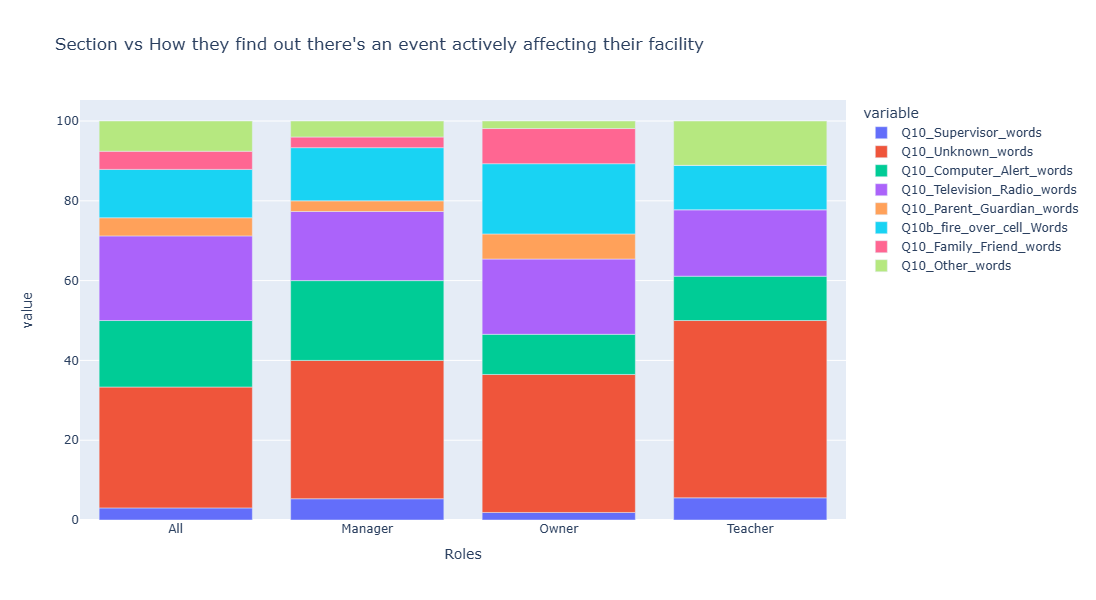

In [7]:
# Making a new derived Roles column
# Define conditions
conditions = [
    (df['Q3)  role_Owner']+df['Q3)  role_Manager']+df['Q3) role_Teacher'])==3,
    (df['Q3)  role_Owner']==1),
    (df['Q3)  role_Manager']==1),
    df['Q3) role_Teacher']==1,
]

# Define corresponding values for the new column
values = ['All', 'Owner', 'Manager','Teacher']

# Apply the conditions
df['Roles'] = np.select(conditions, values, default='No Match')
df=df[df['Roles']!='No Match']

# Values for aggregation
values = ['Q10_Supervisor_words','Q10_Unknown_words','Q10_Computer_Alert_words','Q10_Television_Radio_words','Q10_Parent_Guardian_words','Q10b_fire_over_cell_Words\n\n','Q10_Family_Friend_words','Q10_Other_words'] 
rows = ['Roles'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc='count'  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig2 = px.bar(pivot_table_percentage, x='Roles', y=values, title="Section vs How they find out there's an event actively affecting their facility",
            )

#Figsize
fig2.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)

fig2.show()

### Center Type vs What % of kids are affected indoor

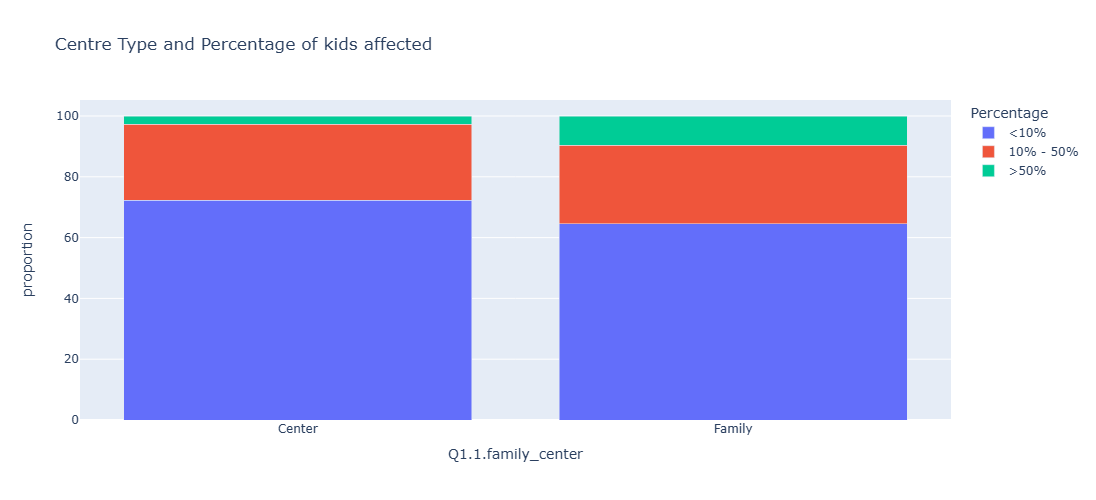

In [9]:
#group by to get the required percentage
df1=df.groupby('Q1.1.family_center')['Q8) kids_affected_smoke_indoors_percentage \nUsing words'].value_counts().reset_index()
df1 = df1.rename(columns={'Q8) kids_affected_smoke_indoors_percentage \nUsing words': 'Percentage'})
df1 = df1[df1['Percentage'] != 0]

# Calculate category-wise total count
category_totals = df1.groupby('Q1.1.family_center')['count'].sum()

# Calculate proportion within category
df1['proportion'] = df1.apply(lambda row: (row['count'] / category_totals[row['Q1.1.family_center']]) * 100, axis=1)

fig3 = px.bar(
    df1,
    x="Q1.1.family_center",
    y="proportion",
    color="Percentage",
    title="Centre Type and Percentage of kids affected",
    barmode = 'stack' 
)

#Figsize
fig3.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=500,  # Set the height of the chart (adjust as needed)
)

fig3.show()

### Center Type vs Level of effect observed

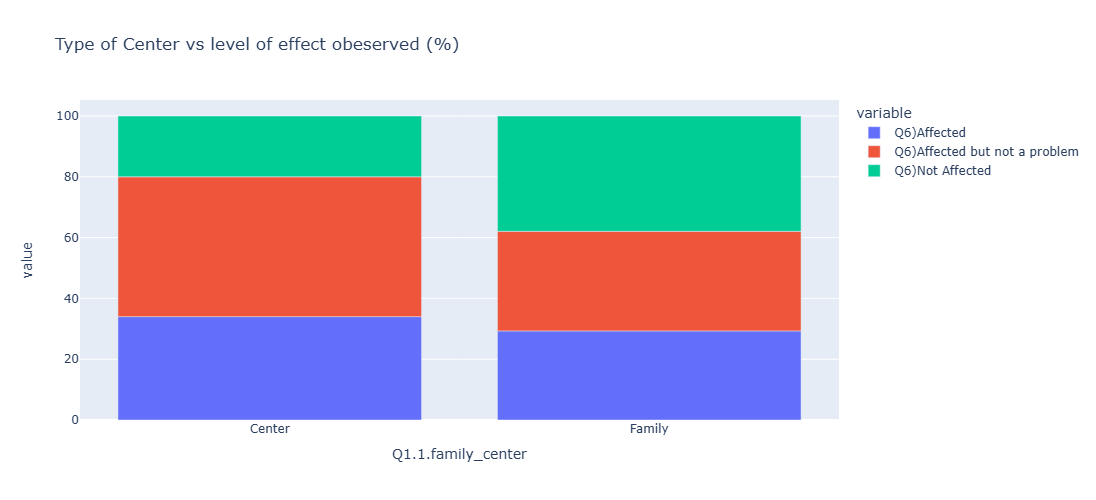

In [11]:
values = ['Q6)Not Affected', 'Q6)Affected but not a problem', 'Q6)Affected'] # Values for aggregation
rows = ['Q1.1.family_center'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc={values[0]: 'count', values[1]: 'count', values[2]: 'count'}  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig4 = px.bar(pivot_table_percentage, x='Q1.1.family_center', y=["Q6)Affected", "Q6)Affected but not a problem", "Q6)Not Affected"], title="Type of Center vs level of effect obeserved (%)")

#Figsize
fig4.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=500,  # Set the height of the chart (adjust as needed)
)

fig4.show()

### % Of people contacted vs respose rate

### Type of center vs How they react to wildfire smoke

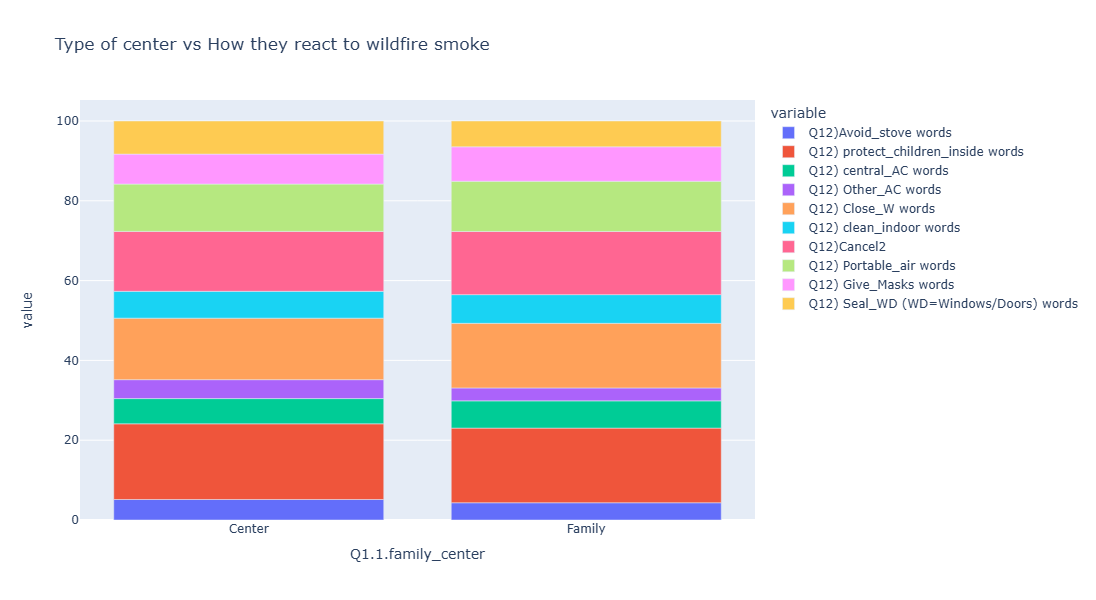

In [14]:
# Values for aggregation
values = ['Q12)Avoid_stove words', 'Q12) protect_children_inside words', 'Q12) central_AC words', 'Q12) Other_AC words','Q12) Close_W words', 'Q12) clean_indoor words', 'Q12)Cancel2', 'Q12) Portable_air words', 'Q12) Give_Masks words','Q12) Seal_WD (WD=Windows/Doors) words'] 
rows = ['Q1.1.family_center'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc='count'  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig5 = px.bar(pivot_table_percentage, x='Q1.1.family_center', y=values, title="Type of center vs How they react to wildfire smoke")

#Figsize
fig5.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)

fig5.show()

### Section vs How they find out of an event could affect their facility

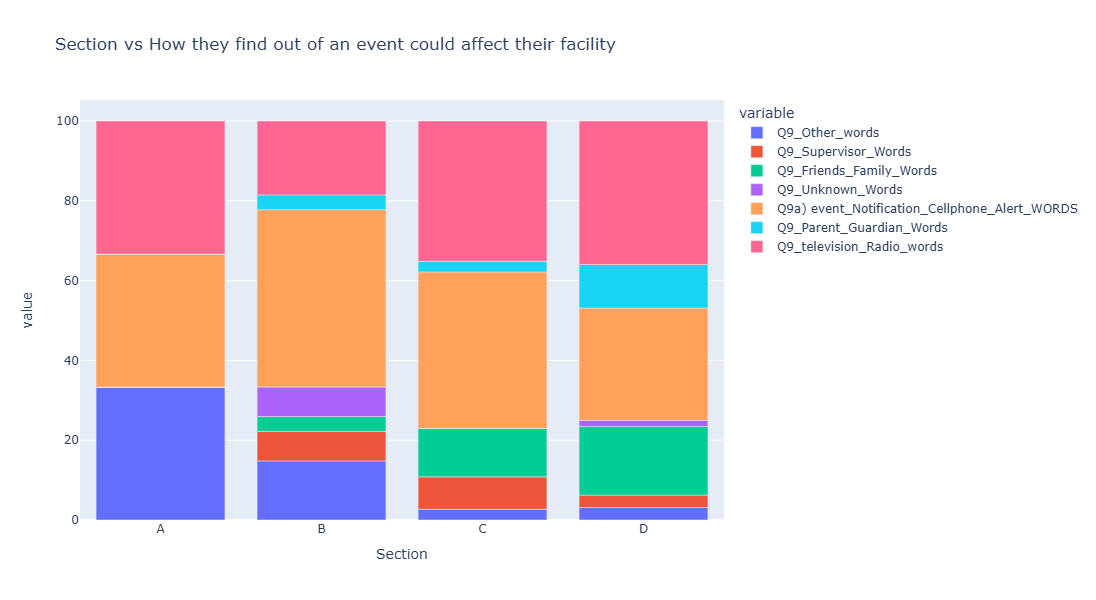

In [16]:
# Values for aggregation
values = ['Q9_Other_words','Q9_Supervisor_Words','Q9_Friends_Family_Words','Q9_Unknown_Words','Q9a) event_Notification_Cellphone_Alert_WORDS','Q9_Parent_Guardian_Words','Q9_television_Radio_words'] 
rows = ['Section'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc='count'  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig6 = px.bar(pivot_table_percentage, x='Section', y=values, title="Section vs How they find out of an event could affect their facility")

#Figsize
fig6.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)

fig6.show()

### Section vs How they find out an event is actively affecting their facility

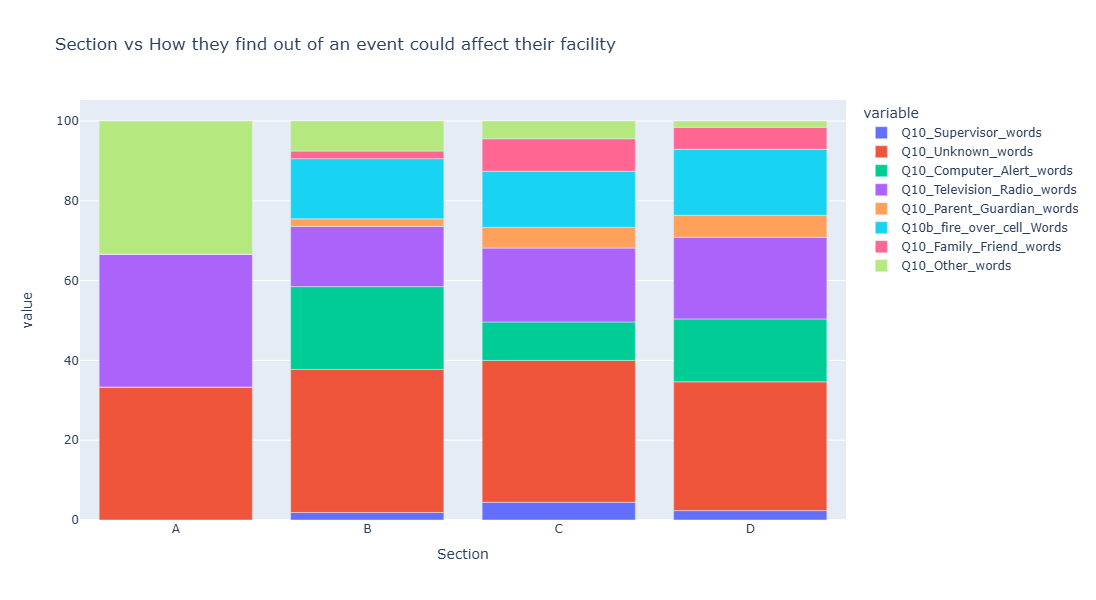

In [18]:
# Values for aggregation
values = ['Q10_Supervisor_words','Q10_Unknown_words','Q10_Computer_Alert_words','Q10_Television_Radio_words','Q10_Parent_Guardian_words','Q10b_fire_over_cell_Words\n\n','Q10_Family_Friend_words','Q10_Other_words'] 
rows = ['Section'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc='count'  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig7 = px.bar(pivot_table_percentage, x='Section', y=values, title="Section vs How they find out of an event could affect their facility",
            )

#Figsize
fig7.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)

fig7.show()

### Section vs Percentage of Affected indoors

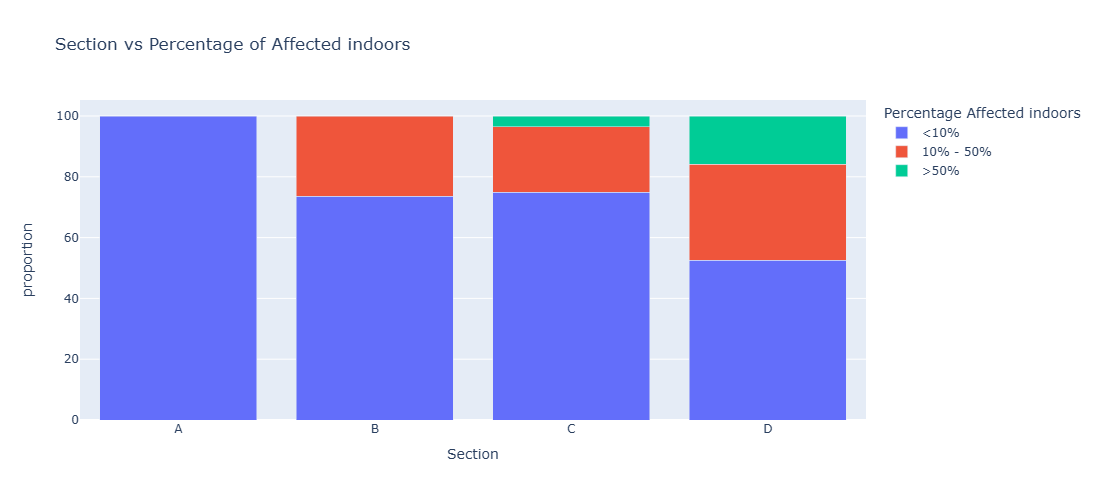

In [20]:
#group by to get the required percentage
df1=df.groupby('Section')['Q8) kids_affected_smoke_indoors_percentage \nUsing words'].value_counts().reset_index()
df1 = df1.rename(columns={'Q8) kids_affected_smoke_indoors_percentage \nUsing words': 'Percentage Affected indoors'})
df1 = df1[df1['Percentage Affected indoors'] != 0]

# Calculate category-wise total count
category_totals = df1.groupby('Section')['count'].sum()

# Calculate proportion within category
df1['proportion'] = df1.apply(lambda row: (row['count'] / category_totals[row['Section']]) * 100, axis=1)

#Plotly bar plot
fig8 = px.bar(
    df1,
    x="Section",
    y="proportion",
    color="Percentage Affected indoors",
    title="Section vs Percentage of Affected indoors",
    barmode = 'stack' 
)

#Figsize
fig8.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=500,  # Set the height of the chart (adjust as needed)
)

fig8.show()

### Section vs Percentage of Affected outdoors

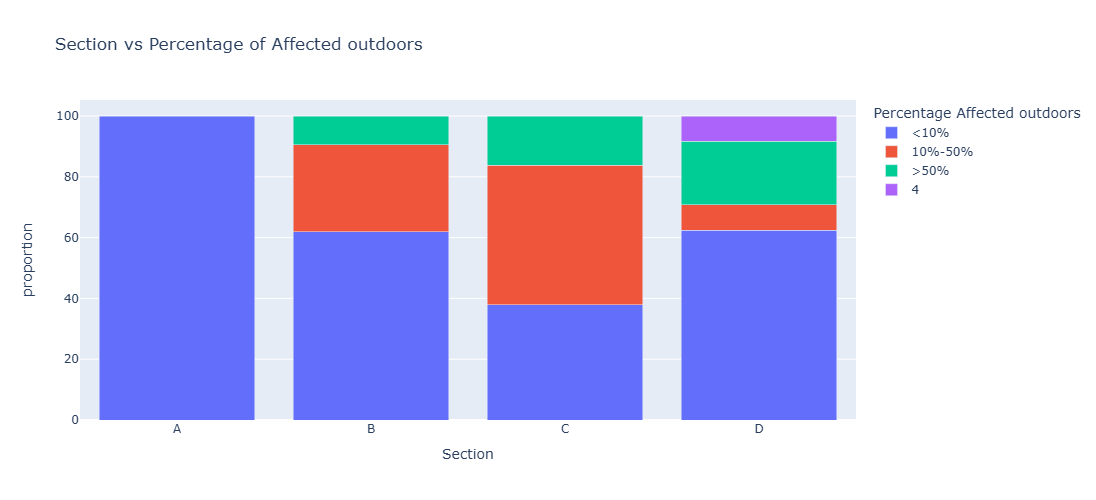

In [22]:
#group by to get the required percentage
df1=df.groupby('Section')['Q7 kids_affected_smoke_percentage_outdoors\nWORDS'].value_counts().reset_index()
df1 = df1.rename(columns={'Q7 kids_affected_smoke_percentage_outdoors\nWORDS': 'Percentage Affected outdoors'})
df1 = df1[df1['Percentage Affected outdoors'] != 0]

# Calculate category-wise total count
category_totals = df1.groupby('Section')['count'].sum()

# Calculate proportion within category
df1['proportion'] = df1.apply(lambda row: (row['count'] / category_totals[row['Section']]) * 100, axis=1)

#Plotly bar plot
fig9 = px.bar(
    df1,
    x="Section",
    y="proportion",
    color="Percentage Affected outdoors",
    title="Section vs Percentage of Affected outdoors",
    barmode = 'stack' 
)

#Figsize
fig9.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=500,  # Set the height of the chart (adjust as needed)
)

fig9.show()

### Section vs Level of effect on Children

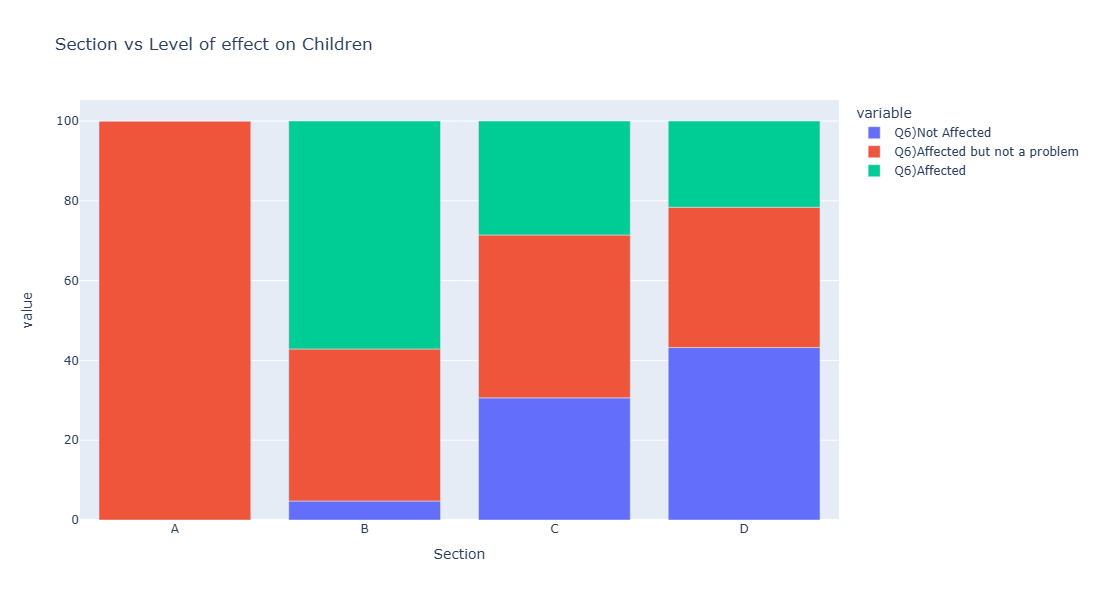

In [24]:
# Values for aggregation
values = ['Q6)Not Affected', 'Q6)Affected but not a problem', 'Q6)Affected'] 
rows = ['Section'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc='count'  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig10 = px.bar(pivot_table_percentage, x='Section', y=values, title="Section vs Level of effect on Children",
            )

#Figsize
fig10.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)

fig10.show()

### % of Reponse Stats from each Section

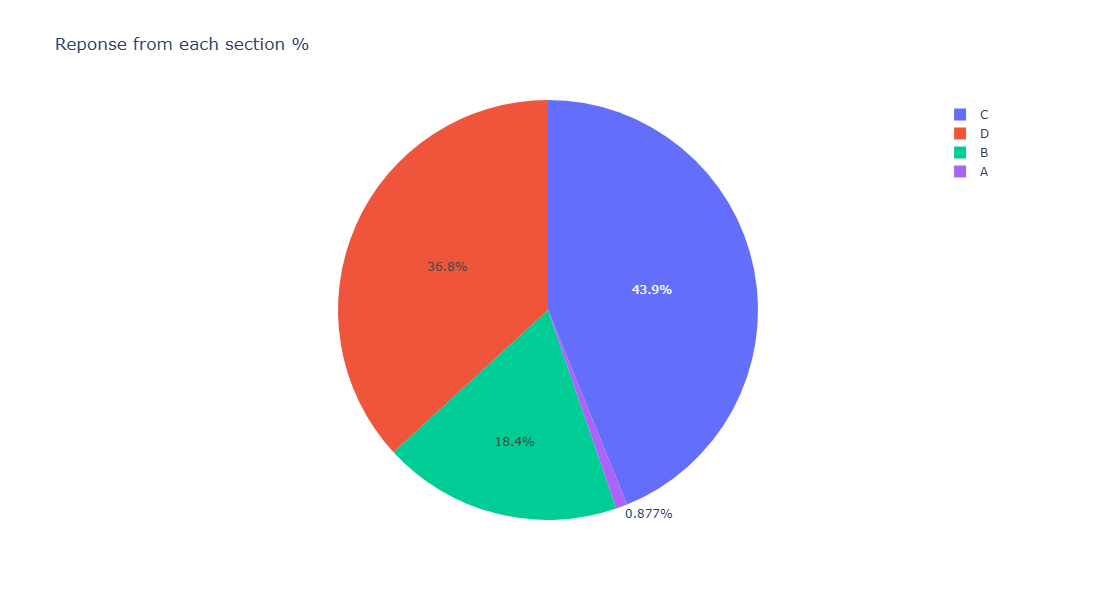

In [26]:
df1=(df['Section'].value_counts(normalize=True)*100).reset_index()

#Plotly pie chart
fig11 = px.pie(df1, values='proportion', names='Section', title='Reponse from each section %')
fig11.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)
fig11.show()

### Section vs Reaction to wildfire

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

df = pd.read_excel("Final Sheet.xlsx", sheet_name="Data (2)")

# Values for aggregation
values = ['Q12)Avoid_stove words', 'Q12) protect_children_inside words', 'Q12) central_AC words', 'Q12) Other_AC words','Q12) Close_W words', 'Q12) clean_indoor words', 'Q12)Cancel2', 'Q12) Portable_air words', 'Q12) Give_Masks words','Q12) Seal_WD (WD=Windows/Doors) words'] 
rows = ['Section'] #rows

#Pivot table
pivot_table = pd.pivot_table(
    df,
    values= values,  
    index= rows,  # Rows
    columns=None,       # Columns
    aggfunc='count'  # Aggregation functions
)

pivot_table_percentage = round(pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100,2)
pivot_table_percentage=pivot_table_percentage.reset_index()
pivot_table_percentage.columns

#Plotly bar plot
fig12 = px.bar(pivot_table_percentage, x='Section', y=values, title="Section vs reaction to wildfire smoke")

#Figsize
fig12.update_layout(
    width=1000,  # Set the width of the chart (adjust as needed)
    height=600,  # Set the height of the chart (adjust as needed)
)

fig12.show()

ModuleNotFoundError: No module named 'pandas'

### Generating HTML

In [30]:
import plotly.offline as pyo

# List of your already generated figures (fig1 to fig12)
figures = [fig1, fig2, fig3, fig4, fig5, fig6, fig7, fig8, fig9, fig10, fig11, fig12]

# Generate the HTML content for each figure
fig_divs = []
for i, fig in enumerate(figures, start=1):
    fig_div = pyo.plot(fig, include_plotlyjs=False, output_type='div')
    fig_divs.append(f'<div id="plot{i}">{fig_div}</div>')

# Join all the divs for each plot into one string
plots_html = "\n".join(fig_divs)

# Create the complete HTML content with Plotly.js library included
html_content = f"""
<html>
<head>
    <title>Multiple Plotly Plots</title>
    <!-- Include Plotly.js library -->
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <style>
        body {{
            display: flex;
            flex-direction: column;
            align-items: center;
            justify-content: center;
            margin: 0;
            background-color: #f4f4f4;
        }}
        .plot {{
            width: 80%;  /* Adjust width as needed */
            margin-bottom: 20px;
        }}
    </style>
</head>
<body>
    {plots_html}
</body>
</html>
"""

# Save to an HTML file
with open("plots.html", "w") as f:
    f.write(html_content)
